# Домашнее задание 1 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [132]:
import pandas as pd
%matplotlib inline

In [133]:
pd.read_csv('2008.csv')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [134]:
#!pip install scikit-learn

In [135]:
df= pd.read_csv('2008.csv')
df.columns
df.sort_values(by=[ 'Cancelled'],ascending=False)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2541,2008,3,31,1,NaN,1900,NaN,2115,AA,510,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
33037,2008,2,6,3,NaN,645,NaN,900,MQ,4221,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
50265,2008,5,31,6,NaN,945,NaN,1050,UA,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
28354,2008,12,11,4,NaN,853,NaN,930,EV,5210,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
54512,2008,5,11,7,NaN,900,NaN,1147,UA,606,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,2008,5,19,1,1714.0,1717,1818.0,1817,NW,233,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
23606,2008,12,21,7,1520.0,1455,1627.0,1605,OO,2753,...,5.0,12.0,0,NaN,0,22.0,0.0,0.0,0.0,0.0
23607,2008,6,16,1,658.0,700,801.0,805,WN,7,...,5.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
23608,2008,9,10,3,1234.0,1238,1824.0,1845,NW,272,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [163]:
# Your code here
df= pd.read_csv('2008.csv')
df.columns
df.sort_values(by=[ 'Cancelled'],ascending=False)
df['CancellationCode'].value_counts()
#получили что причина а самая частая это carrier

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [164]:
# Your code here
df.sort_values(by=[ 'Distance'],ascending=False)
# это найдет минимальное и максимальное (не на прямую но покажет) лиь=бо дф дескрайб
df.describe()
#соответственно максимальное 70 тысяч минимальное 31 среднее 724.508257

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,70000.0,70000.000000,70000.000000,70000.000000,68601.000000,70000.000000,68444.000000,70000.000000,70000.000000,68418.000000,...,70000.000000,68444.000000,68594.000000,70000.000000,70000.000000,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000
mean,2008.0,6.380300,15.742300,3.925900,1331.025058,1324.217071,1478.600842,1492.904771,2214.752114,126.960931,...,724.508257,6.847189,16.435621,0.020157,0.002443,15.862388,2.829935,16.751918,0.078935,20.698944
std,0.0,3.419011,8.813738,1.995955,477.005973,463.231562,504.601176,482.071631,1963.606525,70.382109,...,565.485009,4.884862,11.297027,0.140539,0.049365,38.596304,17.687256,32.017588,2.063460,39.068022
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,928.000000,926.000000,1106.000000,1115.000000,614.000000,76.000000,...,324.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1323.000000,1316.000000,1510.000000,1515.000000,1562.000000,109.000000,...,575.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1725.000000,1715.000000,1906.000000,1905.000000,3500.000000,156.000000,...,950.000000,8.000000,19.000000,0.000000,0.000000,17.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,7828.000000,686.000000,...,4962.000000,165.000000,317.000000,1.000000,1.000000,1146.000000,516.000000,914.000000,175.000000,784.000000


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [165]:
# Your code here
#Да выглядит тк 31  это странно
df1=df.loc[df['Distance'] == 31]
df1[['DayofMonth','DayOfWeek','UniqueCarrier','FlightNum']]

,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum
1116,30,2,AS,65
6958,26,5,AS,65
17349,18,1,AS,64
27534,11,2,AS,64
46082,9,6,AS,65
48112,28,4,AS,64


Это было в разные дни двумя рейсами АС65 и АС 64 

In [166]:
li = [64,65]

df1=df[df.FlightNum.isin(li)]
df1[df1['UniqueCarrier']=='AS']


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
1389,2008,3,13,4,1748.0,1804,2048.0,2057,AS,64,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1517,2008,7,10,4,733.0,730,837.0,834,AS,65,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3869,2008,7,1,2,1837.0,1841,1904.0,1916,AS,64,...,6.0,3.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4466,2008,6,29,7,1748.0,1609,1837.0,1657,AS,64,...,3.0,11.0,0,NaN,0,99.0,0.0,1.0,0.0,0.0
6326,2008,10,18,6,906.0,913,953.0,957,AS,65,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
8448,2008,2,10,7,1401.0,1405,1452.0,1456,AS,64,...,4.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
10113,2008,7,24,4,1310.0,1301,1454.0,1446,AS,65,...,3.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
12980,2008,8,6,3,1833.0,1841,1859.0,1916,AS,64,...,4.0,4.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Это все рейсы этих двух самолетов

In [167]:

df1.sort_values(by=['DayofMonth'])


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
26109,2008,4,1,2,1240.0,1244,1432.0,1431,AS,65,...,3.0,27.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3869,2008,7,1,2,1837.0,1841,1904.0,1916,AS,64,...,6.0,3.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
48020,2008,11,1,6,931.0,930,1159.0,1204,B6,64,...,9.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
39438,2008,5,2,5,1344.0,1310,1517.0,1451,AS,65,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,26.0
13155,2008,7,2,3,1039.0,1040,1740.0,1748,DL,64,...,9.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50888,2008,9,30,2,918.0,913,1003.0,957,AS,65,...,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
31375,2008,3,30,7,922.0,935,1146.0,1205,B6,64,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
55053,2008,3,31,1,1408.0,1405,1453.0,1456,AS,64,...,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [168]:
# Your code here
df['Origin'].value_counts()


Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
GST       1
ADK       1
PLN       1
INL       1
BLI       1
Name: count, Length: 297, dtype: int64

Аталанта

**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [169]:
# Your code here
df[['Origin','AirTime']]


,Origin,AirTime
0,MDW,46.0
1,IAH,108.0
2,MDW,125.0
3,SLC,79.0
4,LAS,136.0
...,...,...
69995,ORD,86.0
69996,ORD,30.0
69997,DAY,63.0
69998,RSW,192.0


In [170]:
df.groupby('Origin')['AirTime'].mean()


Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

In [171]:
df.groupby('Origin')['AirTime'].mean().nlargest(1)

Origin
SJU    205.2
Name: AirTime, dtype: float64

**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [172]:
# Your code here
df.groupby('Origin')['DepDelay'].nlargest()



df.value_counts('Origin')
df1=df[df['DepDelay']>0]
df1.value_counts('DepDelay')
df1.value_counts('Origin')


Origin
ATL    1739
ORD    1649
DFW    1283
DEN    1063
LAX     859
       ... 
RHI       1
BRO       1
GST       1
CDC       1
RFD       1
Name: count, Length: 277, dtype: int64

Значит нам подходят только DEN DFW ORD ATL

In [173]:
df1.value_counts('DepDelay')

DepDelay
1.0       2315
2.0       1642
3.0       1387
4.0       1185
5.0       1132
          ... 
316.0        1
313.0        1
312.0        1
311.0        1
1146.0       1
Name: count, Length: 362, dtype: int64

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [174]:
# Your code here
import pandas as pd
pd.read_csv('2008.csv')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [175]:
Да, пропушенные значения имеются (в полях по Delay и cancellation code их сразу видно)

SyntaxError: invalid syntax (3573989107.py, line 1)

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [176]:
import pandas as pd
df=pd.read_csv('2008.csv')

missing_values = df.isnull().values.any() #но зачем верить глазам если можно проверить функцией (его не выводим тк и так знаем ответ)
total_missing_values = df.isnull().sum().sum()
print(f"Сколько всего пропущенных элементов в таблице? {total_missing_values}") 
objects_with_missing = df[df.isnull().any(axis=1)].shape[0]
print(f"Сколько объектов имеют хотя бы один пропуск? {objects_with_missing}")
features_with_missing = df.columns[df.isnull().any()].size
print(f"Сколько признаков имеют хотя бы одно пропущенное значение? {features_with_missing}")


Сколько всего пропущенных элементов в таблице? 355215
Сколько объектов имеют хотя бы один пропуск? 70000
Сколько признаков имеют хотя бы одно пропущенное значение? 16


In [177]:
Целевая переменная это DepDelay 

SyntaxError: invalid syntax (747187766.py, line 1)

In [178]:
has_missing_values = df['DepDelay'].isnull().any()
print(f"Имеются ли в данных пропущенные значения? {has_missing_values}")
missing_target_data = df[df['DepDelay'].isnull()]
print(f"Количество объектов с пропущенными значениями целевой переменной: {missing_target_data.shape[0]}")

# Выводим информацию о таких объектах
print(missing_target_data.describe())

Имеются ли в данных пропущенные значения? True
Количество объектов с пропущенными значениями целевой переменной: 1399
         Year        Month   DayofMonth    DayOfWeek  DepTime   CRSDepTime  \
count  1399.0  1399.000000  1399.000000  1399.000000      0.0  1399.000000   
mean   2008.0     5.646891    15.562545     3.987848      NaN  1379.989993   
std       0.0     3.705114     8.585107     2.018653      NaN   462.847110   
min    2008.0     1.000000     1.000000     1.000000      NaN    50.000000   
25%    2008.0     2.000000     9.000000     2.000000      NaN  1000.000000   
50%    2008.0     5.000000    15.000000     4.000000      NaN  1420.000000   
75%    2008.0     9.000000    22.000000     6.000000      NaN  1755.000000   
max    2008.0    12.000000    31.000000     7.000000      NaN  2359.000000   

       ArrTime   CRSArrTime    FlightNum  ActualElapsedTime  ...     Distance  \
count      0.0  1399.000000  1399.000000                0.0  ...  1399.000000   
mean       NaN  1

In [179]:
#Есои я правильно понимаю то это те рейсы которые прилетели вовремя без задержек и в переменной Cancelled у них у всех 1 ,
#что значит что нам не интересны рейсы которые отменились а значит можем вырезать этот столбец и столбец Cancellation code

In [180]:
#  Исключение объектов с пропущенным значением целевой переменной и значением 0
df_cleaned = df.dropna(subset=['DepDelay'])  # Удаляем строки с NaN в DepDelay
df_cleaned = df_cleaned[df_cleaned['DepDelay'] != 0]  # Удаляем строки с DepDelay == 0
df_cleaned = df_cleaned.drop(columns=['Cancelled']) # Удаляем признак отмененности
df_cleaned = df_cleaned.drop(columns=['CancellationCode'])# Удаляем и его тоже
#  Выделение целевой переменной и матрицы "объект-признак"
y = df_cleaned['DepDelay']  # Целевая переменная
X = df_cleaned.drop(columns=['DepDelay'])  # Матрица "объект-признак" для удобства можно было бы еще вывести размерности Х и Y (чтобы в циклах знать сколько у нас элементво)

In [181]:
# Your code here

**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [188]:
# Your code here

df=df_cleaned
def split_time_column(column_name):
    # Создаем новые столбцы для часов и минут
    df[f'{column_name}Hour'] = df[column_name] // 100
    df[f'{column_name}_Minute'] = df[column_name] % 100
    
    # Обрабатываем пропуски
    df.loc[df[column_name].isnull(), [f'{column_name}Hour', f'{column_name}_Minute']] = None

    # Удаляем исходный признак
    df.drop(columns=[column_name], inplace=True)

# Применяем функцию к необходимым признакам
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for time_col in time_columns:
    split_time_column(time_col)

# Проверяем результат
print(df.head())

KeyError: 'DepTime'

**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [189]:
#Разница между Временем отправления и запланированным временем отправлеиия и есть наша искомая величина то удалим запланированное время

In [190]:
# Your code here
df1 = df.drop(columns=['TailNum']) #
df1 = df1.drop(columns=['Year'])#
df1 = df1.drop(columns=['CRSDepTimeHour'])#
df1 = df1.drop(columns=['CRSDepTime_Minute'])#
print(df1.head())

   Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  ActualElapsedTime  \
0      6          18          3            WN        242               57.0   
1      6           4          3            XE       2380              124.0   
2      8           3          7            WN       1769              138.0   
3      1          23          3            OO       3802              102.0   
4      5           4          7            WN        399              148.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  ... WeatherDelay NASDelay  \
0            65.0     46.0       8.0      16.0  ...          NaN      NaN   
1           138.0    108.0       2.0      16.0  ...          NaN      NaN   
2           155.0    125.0     -19.0      -2.0  ...          NaN      NaN   
3           111.0     79.0     -12.0      -3.0  ...          NaN      NaN   
4           160.0    136.0     -17.0      -5.0  ...          NaN      NaN   

   SecurityDelay  LateAircraftDelay  DepTimeHour  DepTime_Minu

**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [191]:
X['DepTimeHour'].hist(bins=20) #Найти ошибку не удается, выше проверил что у меня везде есть дептайм хоур

KeyError: 'DepTimeHour'

<Axes: >

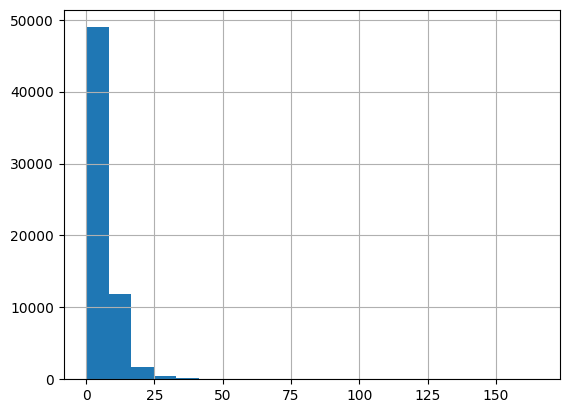

In [186]:
X['TaxiIn'].hist(bins=20)

<Axes: >

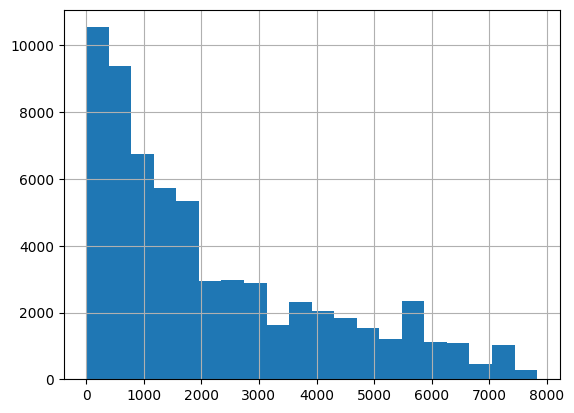

In [187]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [192]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def transform_data(df):
    # Копируем DataFrame, чтобы не изменять исходный
    df_transformed = df.copy()
    
    # Определяем типы признаков
    numeric_cols = df_transformed.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_transformed.select_dtypes(include=['object']).columns
    
    # Замена пропущенных значений
    df_transformed[numeric_cols] = df_transformed[numeric_cols].fillna(0)
    df_transformed[categorical_cols] = df_transformed[categorical_cols].fillna('nan')
    
    # Масштабирование вещественных признаков
    scaler = StandardScaler()
    df_transformed[numeric_cols] = scaler.fit_transform(df_transformed[numeric_cols])
    
    # One-hot-кодирование категориальных признаков
    df_encoded = pd.get_dummies(df_transformed, columns=categorical_cols, drop_first=True)
    
    return df_encoded

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [193]:
# Your code here
transform_data(df1)

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,0.144971,-0.744130,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.144971,0.183961,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,-0.354394,0.471018,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.382136,-0.347886,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,-0.437621,0.634799,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.431159,-0.437621,-0.120706,...,False,False,False,False,False,False,False,False,False,False
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.533455,-0.604076,-0.217566,...,False,False,False,False,False,False,False,False,False,False
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.336062,0.366910,-1.043514,...,False,False,False,False,False,False,False,False,False,False
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,0.310488,-0.132454,1.208912,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Признаков получилось многа. 635 колонок это 634 признака

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [ ]:
# Your code here

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?